# Import and export of electricity in 2030

I wish to analyse how much Denmark will import and export Clean data into seperate import and export values. Calculate the nX for each and merge into one nx dataframe. 

Imports and set magics:

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

I load the datasheet from the Danish Energy Agency. The datasheet is a projection of the import and export of power between Denmark and its trading countries for the period 2023-2035.

In [169]:
# Loading all sheets with the argument 'sheet_name=None'
excel_data = pd.read_excel('kf22_elsystem_timeserier-2.xlsx', sheet_name=None)

I create a dictionary for the data to be stored:

In [170]:
all_data = {}

I create a loop for all the sheets to clean the data. I wish to capture the export and import from Denmark in each sheet. Notice that Denmark is divided into two areas, DK1 and DK2, and I therefore need to merge these at a later point. For now, it is included in the data cleaning, even though the net export from DK1 to DK2 will not be part of this analysis. 

In [171]:
# To access the data in each sheet, I use the loop:
for sheet_name, sheet_data in excel_data.items():
    
    # I extract the export from B2-N2 and the import from P2-AB2:
    trading_directions = sheet_data.iloc[0, 0:].values.tolist()
    num_directions = len(trading_directions) // 2
    exportDK = sheet_data.iloc[0, 1:num_directions].values.tolist()
    importDK = sheet_data.iloc[0, num_directions+1:2*num_directions+1].values.tolist()


    # Create data frames for each trading direction
    sheet_data_frames = {}
    for i, direction in enumerate(exportDK):
        # Extract the data for the current trading direction
        start_col = 1
        end_col = start_col + 13
        data = sheet_data.iloc[2:8767, start_col:end_col]

        # Set the column names to the year values in row 3
        data.columns = sheet_data.iloc[1, start_col:end_col].values.tolist()

        # Set the index to the hours
        data.index = sheet_data.iloc[2:8767, 0]
        data.index.name = 'hours'
        
        # Add the data frame to the sheet_data_frames dict
        sheet_data_frames[direction] = data

    for i, direction in enumerate(importDK):
        # Extract the data for the current trading direction
        start_col = 15
        end_col = start_col + 13
        data = sheet_data.iloc[2:8767, start_col:end_col]

        # Set the column names to the year values
        data.columns = sheet_data.iloc[1, start_col:end_col].values.tolist()

        # Set the index to the hours
        data.index = sheet_data.iloc[2:8767, 0]
        data.index.name = 'hours'

        # Add the data frame to the sheet_data_frames dict
        sheet_data_frames[direction] = data

    # Add the sheet_data_frames dictionary to the all_data dict
    all_data[sheet_name] = sheet_data_frames

In [172]:
all_data

{'DK1_DK2': {'DK1 til DK2':        2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
  hours                                                                  
  1.0       0    0  443  422  566  445    0    0    0    0    5   51  227
  2.0       0    0  292  360  566  348    0    0    0    0    0    0   98
  3.0       0    0  258  311  520  225    0    0    0    0    0    0    0
  4.0       0    0  210  177  452  140    0    0    0    0    0    0    0
  5.0       0    0  176  325  452  214    0    0    0    0    0   46    0
  ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
  8756.0    0    0    0    0    0    0    0    0    0    0    0    0    0
  8757.0    0    0    0    0    0    0    0    0    0    0    0    0    0
  8758.0    0    0    0    0    0    0    0    0    0    0    0    0    0
  8759.0    0    0    8   16    0    0    0    0    0    0    0    0    0
  8760.0    0    0    0   39    0    0    0    0    0    0    0    0    0
  
  [8760 r

## Explore the data set

Now that I have cleaned the datasets, and incoorporated them into a dictionary, I wish to explore each dataset. In order to be able to **explore the raw data**, I provide **static** and **interactive plots** to show important developments.

I calculate the net export:

In [183]:
dfs = []
for sheet_name, sheets in all_data.items():
    nx = 'NX'  # extract NX from sheet name
    df_names = list(sheets.keys())
    for i in range(0, len(df_names), 2):
        df1 = sheets[df_names[i]]
        df2 = sheets[df_names[i+1]]
        diff = df1 - df2
        nx_sheet_name = f"{nx}{sheet_name.replace('_', '')}"
        dfs.append((nx_sheet_name, diff))

results = {k:v for (k,v) in dfs}

results

{'NXDK1DK2':         2023  2024  2025  2026  2027  2028  2029  2030  2031  2032  2033  \
 hours                                                                      
 1.0        0     0   443   422   566   445     0     0     0     0     5   
 2.0        0     0   292   360   566   348     0     0     0   -37     0   
 3.0        0     0   258   311   520   225     0  -154     0   -51     0   
 4.0        0     0   210   177   452   140     0  -193     0   -86  -103   
 5.0        0     0   176   325   452   214     0     0     0     0     0   
 ...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
 8756.0  -566  -494  -576  -561  -576  -576  -576  -576  -576  -576  -576   
 8757.0  -528     0     0     0   -63  -576  -576  -576  -576  -576  -576   
 8758.0     0     0     0     0     0  -576  -576  -576  -576  -576  -576   
 8759.0     0     0     8    16  -240  -576  -576  -576  -576  -576  -576   
 8760.0     0     0   -22    39  -392  -576  -576  -576  -576  -

I calculate the total net export per year:

In [204]:
dfs = []
for sheet_name, sheets in all_data.items():
    nx = 'NX'  # extract NX from sheet name
    df_names = list(sheets.keys())
    for i in range(0, len(df_names), 2):
        df1 = sheets[df_names[i]]
        df2 = sheets[df_names[i+1]]
        diff = df1 - df2
        nx_sheet_name = f"{nx}{sheet_name.replace('_', '')}"
        dfs.append((nx_sheet_name, diff))

results = {k:v for (k,v) in dfs}

# sum over all 8760 hours for each column in each dataframe
for k, v in results.items():
    results[k] = v.sum(axis=0)

# print the results
print(results)

{'NXDK1DK2': 2023     -501331
2024      -39690
2025     -457289
2026     -482594
2027     -898290
2028    -1689376
2029    -2048979
2030    -2519669
2031    -2466381
2032    -2298468
2033    -2227441
2034    -1982122
2035    -1983422
dtype: object, 'NXDK1NO': 2023     -507040
2024    -2730939
2025    -2955834
2026    -2596267
2027    -2611256
2028    -2828746
2029    -3553239
2030    -3561332
2031    -3164004
2032    -3238260
2033    -3054663
2034    -2766293
2035    -2887635
dtype: object, 'NXDK1SE': 2023    -1431971
2024    -2133796
2025    -2576794
2026    -2473896
2027    -2636464
2028    -2732534
2029    -3141743
2030    -3292792
2031    -2908558
2032    -2841451
2033    -2722528
2034    -2410011
2035    -2456360
dtype: object, 'NXDK1DELU': 2023      137717
2024    10897490
2025    14617084
2026    14491626
2027    13376841
2028    11845262
2029    10948517
2030    12130357
2031    10915613
2032    10860892
2033    10328997
2034     9572750
2035     8694460
dtype: object, 'NXDK1NL

# Merge data sets

I merge the data into one dataframe: 

In [207]:
# convert the dictionary of totals to a dataframe, keeping all the values
df_totals = pd.DataFrame.from_dict(results, orient='columns').transpose()
#I divide it by 1000 to get in GWh instead of MWh
df_totals=df_totals/1000
df_totals

,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
NXDK1DK2,-501.331,-39.69,-457.289,-482.594,-898.29,-1689.376,-2048.979,-2519.669,-2466.381,-2298.468,-2227.441,-1982.122,-1983.422
NXDK1NO,-507.04,-2730.939,-2955.834,-2596.267,-2611.256,-2828.746,-3553.239,-3561.332,-3164.004,-3238.26,-3054.663,-2766.293,-2887.635
NXDK1SE,-1431.971,-2133.796,-2576.794,-2473.896,-2636.464,-2732.534,-3141.743,-3292.792,-2908.558,-2841.451,-2722.528,-2410.011,-2456.36
NXDK1DELU,137.717,10897.49,14617.084,14491.626,13376.841,11845.262,10948.517,12130.357,10915.613,10860.892,10328.997,9572.75,8694.46
NXDK1NL,2550.466,-529.519,-1415.781,-725.604,-635.987,-769.081,-438.688,-6.671,-167.543,-395.502,-461.482,-628.776,-980.997
NXDK1GBNIIE,0.0,-7017.423,-7897.02,-5932.26,-4497.349,-3922.343,-2798.185,-2343.053,-2256.275,-2564.362,-3047.709,-3405.217,-3728.391
NXDK2SE,-815.603,-3930.529,-4134.907,-3880.494,-3482.55,-2276.768,-2792.172,-1892.615,-1116.82,-1282.114,-1138.567,-755.979,-884.82
NXDK2DELU,1533.572,3431.539,4268.752,4252.748,4329.765,4670.961,4903.125,5417.632,5176.448,4930.388,4693.548,4205.335,4000.324


Because the net export between DK1 and DK2 is domestic, I wish to drop this value: 

In [258]:
df_totals= df_totals.drop('NXDK1DK2')

# Analysis

I create a plot, showcasing the development in net export per region:

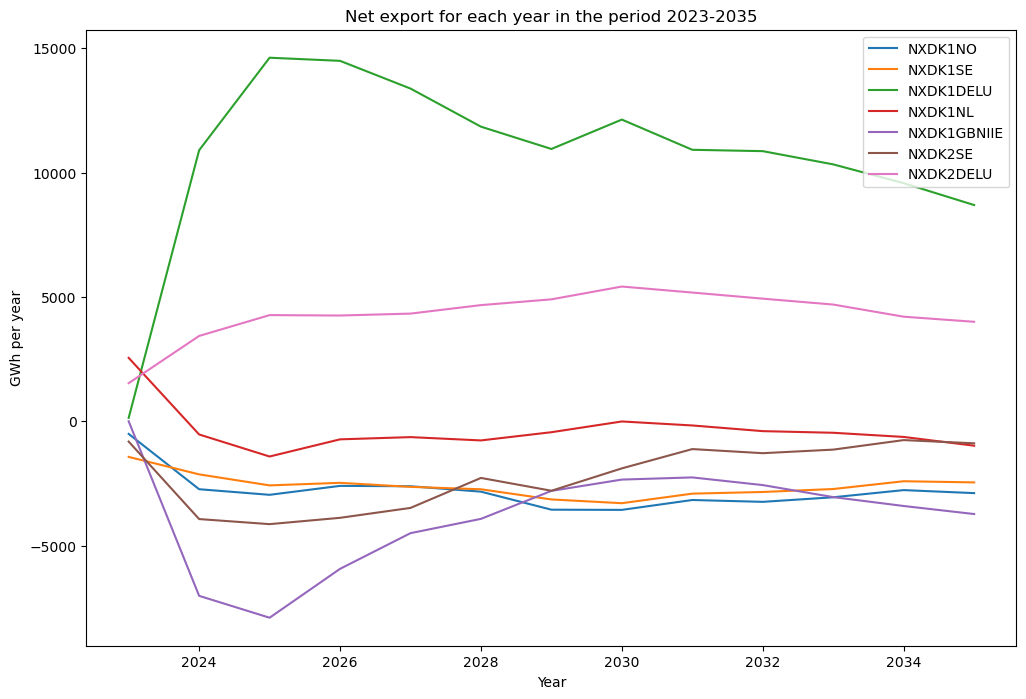

In [262]:
# I create a line plot
df_totals.T.plot(figsize=(12,8))
plt.title('Net export for each year in the period 2023-2035')
plt.xlabel('Year')
plt.ylabel('GWh per year')
#plt.xticks(['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'])
plt.show()

Furthermore, I look at a heatmap: 

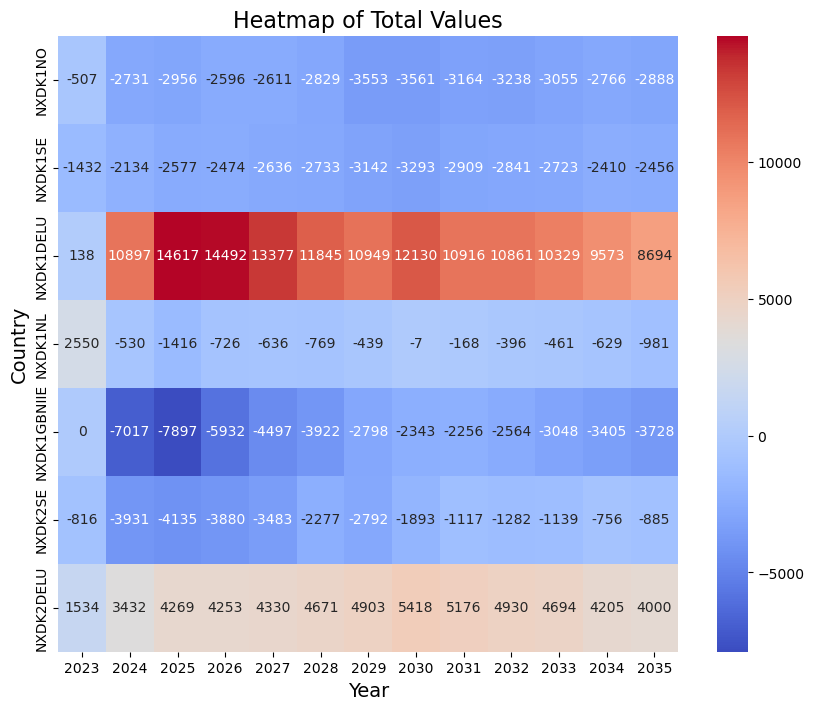

In [263]:
df_totals = df_totals.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10,8))
sns.heatmap(df_totals, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Heatmap of Total Values', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

From these figures, it is apparent that the net export is largest to the german area, and that there is a large import from GBNIIE. Furthermore, I note that there is no trade with GBNIIE in 2023, as the transmissionlines have not yet been established. 

I wish to calculate the total netexport for 2030, and therefore I ***split*** the data to only include 2030:

In [264]:
df2030= df_totals[2030]


I then ***apply*** the statistic, which is the sum of all net export:

In [265]:
df2030.sum()

6451.526

# Conclusion

Therefore, DK will be net exporters of electricity with a yearly export of 6451.53 GWh.